## Testing the constraints function

In [1]:
%load_ext autoreload
%autoreload 2
import datamol as dm
from medchem.utils.matches import Constraints


In [7]:
def my_constraints(mol):
    # we want to match either (have phenol) OR (have less than 7 atoms and not ring)
    return mol.HasSubstructMatch(dm.to_mol("Oc1ccccc1")) or (
        mol.GetNumAtoms() < 7 and dm.descriptors.n_rings(mol) < 1
    )

smiles = [
    "CN(C)C(=O)c1cncc(C)c1",  # match, n_atoms < 7 and no ring
    "Cc1cncc(CC2CCCCC2)c1",  # not match, n_atoms < 7 but ring
    "Cc1cncc(c1)-c1ccc(O)cc1",  # match phenol
    "Cc1cncc(c1)-c1cccc2nc[nH]c12",  # no match n_atoms >= 7
]
expected_results = []
mols = [dm.to_mol(x) for x in smiles]
core = dm.from_smarts("[C;H3]c1cncc([*:1])c1")

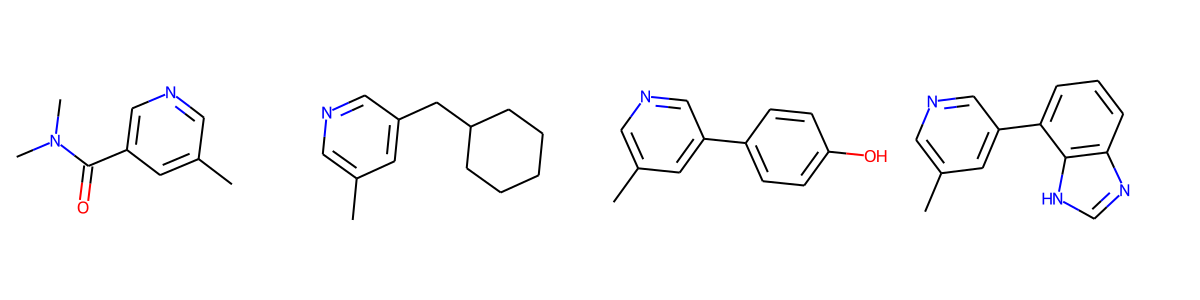

In [8]:
dm.to_image(mols)

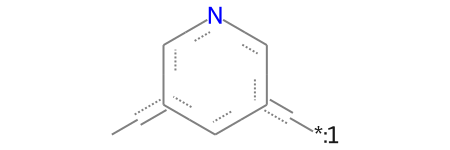

In [9]:
core

In [10]:
# now let's set the constraints query at the query atom of the code
# At atom map num 1, we want the fragment matching to have additional properties
for atom in core.GetAtoms():
    if (
        atom.GetAtomMapNum() == 1
    ):  # we add a recursive query to check again on any match that starts with this atom position
        atom.SetProp("query", "my_constraints")

In [11]:
constraint_fns = dict(my_constraints=my_constraints)
constraint = Constraints(core, constraint_fns)
matches = [constraint(mol) for mol in mols]

In [12]:
matches

[True, False, True, False]